In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd 

In [2]:
os.chdir("/home/laiy/gitrepos/msr_final/LongTermEMG_myo")
from PrepareAndLoadData.process_data import read_data_training

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir_ConvNet = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_ConvNet"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_ConvNet_TSD"

path_ConvNet ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_ConvNet/ConvNet"
save_ConvNet = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_ConvNet_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_ConvNet/ConvNet_DANN"
save_ConvNet_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_ConvNet_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_ConvNet/ConvNet_SCADANN"
save_ConvNet_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_ConvNet/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_ConvNet/DANN"
save_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_ConvNet/SCADANN"
save_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

# 0.a. Prepare Data for ConvNet

In [4]:
# read_data_training(path=data_dir, store_path = processed_data_dir_ConvNet, num_participant=1, spectrogram=True)

In [5]:
# check stored pickle 
with open(processed_data_dir_ConvNet + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train_ConvNet = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train_ConvNet))
labels_datasets_train_ConvNet = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train_ConvNet))

traning examples  (1, 3, 40, 572, 4, 8, 10)
traning labels  (1, 3, 40, 572)


### Specify params used for training and testing

In [6]:
filter_size = [[3, 7], [3, 2], [3, 2], [2, 2]]
num_kernels_ConvNet = [16, 32, 64, 128]
number_of_classes = 22

# 0.b. Prepare Data for TSD

In [7]:
# read_data_training(path=data_dir, store_path = processed_data_dir, num_participant=1)

In [8]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 3, 40, 572, 252)
traning labels  (1, 3, 40, 572)


### Specify params used for training and testing

During training and testing, processed datasets are first put into pytorch dataloders, then feed to the model trainer; following are params for TSD model and dataloaders

* `num_kernels`: list of integers defining number of neurons used in each layer of linear block (linear block has `dropout`=0.5)
* `number_of_cycles_total`: number of trails performed for each session (assuming that all session have the same trail size)
    * 40 for myo
* `number_of_classes`: total number of gestures performed in dataset
    * 22 for myo
* `batch_size`: number of examples stored in each batch
* `feature_vector_input_length`: length of input array or each processed signal 
    * 252 for myo
* `learning_rate`= 0.002515
    

In [9]:
num_kernels=[200, 200, 200]                        # model layer size 
number_of_cycles_total=np.shape(examples_datasets_train[0][0])[0]               # #session
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     # size of one example 
learning_rate=0.002515

number_of_cycles_total  40


# 1.a. ConvNet

In [10]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [11]:
# train_fine_tuning(examples_datasets_train_ConvNet, labels_datasets_train_ConvNet,
#                   num_kernels=num_kernels_ConvNet, path_weight_to_save_to=path_ConvNet,
#                   number_of_classes=number_of_classes, number_of_cycles_total=number_of_cycles_total,
#                   batch_size=batch_size,
#                   learning_rate=learning_rate,
#                   neural_net="Spectrogram", filter_size=filter_size)

In [12]:
algo_name = "standard_ConvNet"
test_standard_model_on_training_sessions(examples_datasets_train_ConvNet, labels_datasets_train_ConvNet,
                                  num_neurons=num_kernels_ConvNet, use_only_first_training=True,
                                  path_weights=path_ConvNet,
                                  save_path = save_ConvNet, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_classes=number_of_classes, cycle_for_test=3,
                                  neural_net="Spectrogram", filter_size=filter_size)

GET one participant_examples  (3, 40, 572, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  0
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  1
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  2
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1

In [13]:
results_filename = save_ConvNet + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
ConvNet_acc = results[0]
ConvNet_acc_overall = np.mean(ConvNet_acc)
ConvNet_df = pd.DataFrame(ConvNet_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(ConvNet_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(ConvNet_acc.shape[0])])
ConvNet_df

,Participant_0
Session_0,0.792133
Session_1,0.535839
Session_2,0.571154


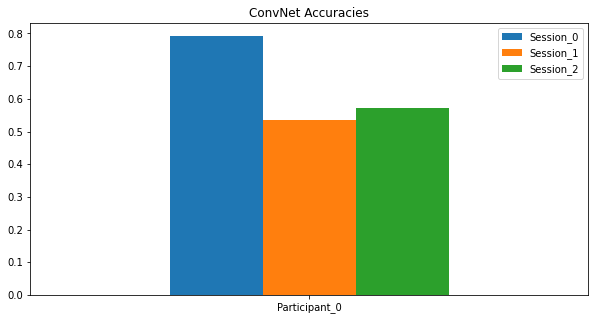

In [14]:
ConvNet_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("ConvNet Accuracies")
plt.show()

In [15]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [16]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Sub"
n_name = "Loc"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 3)
predictions =  (1, 3)
accuracies_gestures =  (22, 3)


,Unnamed: 0,Sub0_Loc0,Sub0_Loc1,Sub0_Loc2
0,M0,1.000000,1.000000,1.000000
1,M1,0.784615,0.415385,0.496154
2,M2,0.357692,0.057692,0.188462
3,M3,0.884615,0.434615,0.969231
4,M4,0.600000,0.684615,0.011538
5,M5,0.946154,0.442308,0.946154
6,M6,0.861538,0.384615,0.580769
7,M7,0.919231,0.819231,0.869231
8,M8,1.000000,0.996154,0.846154
9,M9,0.846154,0.550000,0.550000


# 1.b. TSD_DNN
* `train_fine_tuning`: used to train data using TSD network only   
    * running this function will save three sets of TSD model weights (each is fine tuned based on the previous training)  
    
* `test_TSD_DNN_on_training_sessions`: test model result


### check if dataloaders are loaded correctly:
* each participant has shape (session_num x 40 x 572 x 252)
* each session has shape (40 x 572 x 252)
* put these data into on group ends up with shape (40*572=22880, 252)
    * shuffle on group of data and put into dataloaders
    * each participant should have 3 sets of dataloaders, each correspond to one session

In [17]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [18]:
# train_fine_tuning(examples_datasets_train, labels_datasets_train,
#                   num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
#                   number_of_classes=number_of_classes, number_of_cycles_total=number_of_cycles_total,
#                   batch_size=batch_size,
#                   feature_vector_input_length=feature_vector_input_length,
#                   learning_rate=learning_rate)

In [19]:
algo_name = "standard_TSD"
test_standard_model_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 3)
0  SESSION   data =  5720
Participant:  0  Accuracy:  0.9517482517482517
1  SESSION   data =  5720
Partic

In [20]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(TSD_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(TSD_acc.shape[0])])
TSD_df

,Participant_0
Session_0,0.951748
Session_1,0.69458
Session_2,0.654371


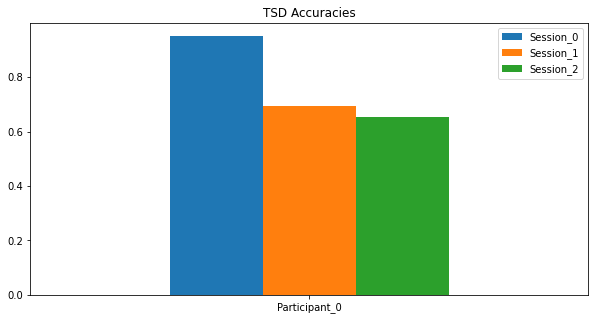

In [21]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [22]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [23]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Sub"
n_name = "Loc"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 3)
predictions =  (1, 3)
accuracies_gestures =  (22, 3)


,Unnamed: 0,Sub0_Loc0,Sub0_Loc1,Sub0_Loc2
0,M0,1.000000,1.000000,1.000000
1,M1,1.000000,0.569231,0.742308
2,M2,0.819231,0.415385,0.757692
3,M3,0.865385,0.392308,0.942308
4,M4,0.865385,0.792308,0.200000
5,M5,0.976923,0.423077,0.873077
6,M6,0.996154,0.634615,0.534615
7,M7,0.992308,0.630769,0.323077
8,M8,1.000000,0.980769,0.884615
9,M9,1.000000,0.730769,0.726923


# 2.a. ConvNet -> DANN

In [24]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [25]:
# train_DANN(examples_datasets_train_ConvNet, labels_datasets_train_ConvNet, 
#           num_kernels=num_kernels_ConvNet,
#           path_weights_fine_tuning=path_ConvNet,
#           number_of_classes=number_of_classes,
#           number_of_cycles_total = number_of_cycles_total,
#           batch_size=batch_size,
#           path_weights_to_save_to=path_ConvNet_DANN, 
#           learning_rate=learning_rate,
#           neural_net="Spectrogram", filter_size=filter_size)

In [26]:
algo_name = "ConvNet_DANN"
test_DANN_on_training_sessions(examples_datasets_train_ConvNet, labels_datasets_train_ConvNet,
                              num_neurons=num_kernels_ConvNet, path_weights_DA=path_ConvNet_DANN,
                              algo_name=algo_name, save_path = save_ConvNet_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              path_weights_normal=path_ConvNet, number_of_classes=number_of_classes,
                              cycle_for_test=3, neural_net="Spectrogram", filter_size=filter_size)

GET one participant_examples  (3, 40, 572, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  0
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  1
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  2
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1

In [27]:
results_filename = save_ConvNet_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
ConvNet_DANN_acc = results[0]
ConvNet_DANN_acc_overall = np.mean(ConvNet_DANN_acc)
ConvNet_DANN_df = pd.DataFrame(ConvNet_DANN_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(ConvNet_DANN_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(ConvNet_DANN_acc.shape[0])])
ConvNet_DANN_df

,Participant_0
Session_0,0.792133
Session_1,0.576573
Session_2,0.620455


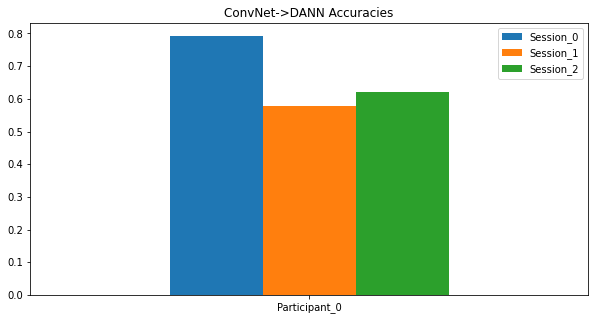

In [28]:
ConvNet_DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("ConvNet->DANN Accuracies")
plt.show()

In [29]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Sub"
n_name = "Loc"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 3)
predictions =  (1, 3)
accuracies_gestures =  (22, 3)


,Unnamed: 0,Sub0_Loc0,Sub0_Loc1,Sub0_Loc2
0,M0,1.000000,1.000000,1.000000
1,M1,0.784615,0.384615,0.819231
2,M2,0.357692,0.253846,0.673077
3,M3,0.884615,0.465385,0.988462
4,M4,0.600000,0.830769,0.053846
5,M5,0.946154,0.542308,0.880769
6,M6,0.861538,0.588462,0.730769
7,M7,0.919231,0.815385,0.534615
8,M8,1.000000,0.984615,0.919231
9,M9,0.846154,0.603846,0.692308


# 2.b. TSD->DANN
* `train_DANN`: train DANN model using the first set of training weights from TSD model
    * two set of training weights will be saved
* `test_DANN_on_training_sessions`: test DANN model

In [30]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [31]:
# train_DANN(examples_datasets_train, labels_datasets_train, 
#           num_kernels=num_kernels,
#           path_weights_fine_tuning=path_TSD,
#           number_of_classes=number_of_classes,
#           number_of_cycles_total = number_of_cycles_total,
#           batch_size=batch_size,
#           feature_vector_input_length=feature_vector_input_length,
#           path_weights_to_save_to=path_DANN, learning_rate=learning_rate)

In [32]:
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_DANN,
                              algo_name=algo_name, save_path = save_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              path_weights_normal=path_TSD, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 3)
(3,)
Participant ID:  0  Session ID:  0  Accuracy:  0.9517482517482517
Participant ID:  0  Session ID:  1

In [33]:
results_filename = save_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(DANN_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(DANN_acc.shape[0])])
DANN_df

,Participant_0
Session_0,0.951748
Session_1,0.698077
Session_2,0.720455


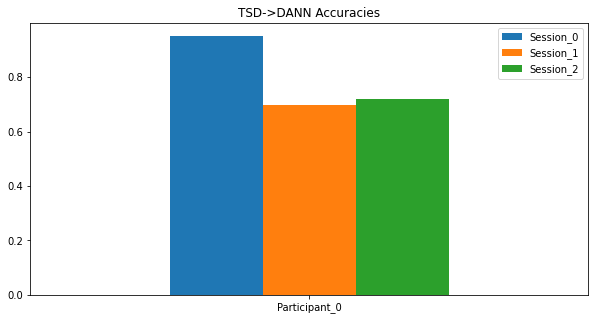

In [34]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD->DANN Accuracies")
plt.show()

In [35]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Sub"
n_name = "Loc"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 3)
predictions =  (1, 3)
accuracies_gestures =  (22, 3)


,Unnamed: 0,Sub0_Loc0,Sub0_Loc1,Sub0_Loc2
0,M0,1.000000,1.000000,1.000000
1,M1,1.000000,0.719231,0.830769
2,M2,0.819231,0.496154,0.873077
3,M3,0.865385,0.465385,0.980769
4,M4,0.865385,0.623077,0.253846
5,M5,0.976923,0.465385,0.900000
6,M6,0.996154,0.634615,0.773077
7,M7,0.992308,0.769231,0.580769
8,M8,1.000000,0.969231,0.946154
9,M9,1.000000,0.780769,0.834615


# 3.a. ConvNet->SCADANN

In [36]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import run_SCADANN_training_sessions, test_network_SCADANN

In [37]:
# percentage_same_gesture_stable = 0.75 
# run_SCADANN_training_sessions(examples_datasets=examples_datasets_train_ConvNet, labels_datasets=labels_datasets_train_ConvNet,
#                               num_kernels=num_kernels_ConvNet, 
#                               path_weights_to_save_to=path_ConvNet_SCADANN,
#                               path_weights_Adversarial_training=path_ConvNet_DANN,
#                               path_weights_Normal_training=path_ConvNet,
#                               number_of_cycles_total = number_of_cycles_total, 
#                               number_of_classes=number_of_classes,
#                               learning_rate=learning_rate,
#                               neural_net="Spectrogram", filter_size=filter_size)

In [38]:
algo_name = "ConvNet_SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train_ConvNet, 
                     labels_datasets_train=labels_datasets_train_ConvNet,
                     num_neurons=num_kernels_ConvNet, 
                     path_weights_SCADANN =path_ConvNet_SCADANN, path_weights_normal=path_ConvNet,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_classes=number_of_classes, save_path = save_ConvNet_SCADANN,
                     neural_net="Spectrogram", filter_size=filter_size)

GET one participant_examples  (3, 40, 572, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  0
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  1
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
   GET one training_index_examples  (40, 572, 4, 8, 10)  at  2
   GOT one group XY  (22880, 4, 8, 10)    (22880,)
       one group XY test  (5720, 4, 8, 10)    (5720, 4, 8, 10)
       one group XY train (20592, 4, 8, 10)    (20592,)
       one group XY valid (2288, 4, 8, 10)    (2288, 4, 8, 10)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1

In [39]:
results_filename = save_ConvNet_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
ConvNet_SCADANN_acc = results[0]
ConvNet_SCADANN_acc_overall = np.mean(ConvNet_SCADANN_acc)
ConvNet_SCADANN_df = pd.DataFrame(ConvNet_SCADANN_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(ConvNet_SCADANN_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(ConvNet_SCADANN_acc.shape[0])])
ConvNet_SCADANN_df

,Participant_0
Session_0,0.792133
Session_1,0.641608
Session_2,0.631119


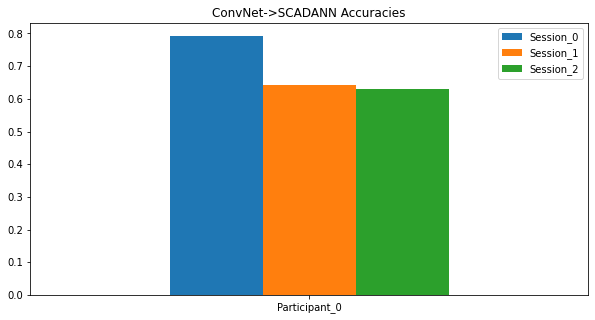

In [40]:
ConvNet_SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("ConvNet->SCADANN Accuracies")
plt.show()

In [41]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Sub"
n_name = "Loc"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 3)
predictions =  (1, 3)
accuracies_gestures =  (22, 3)


,Unnamed: 0,Sub0_Loc0,Sub0_Loc1,Sub0_Loc2
0,M0,1.000000,1.000000,1.000000
1,M1,0.784615,0.384615,0.996154
2,M2,0.357692,0.292308,0.680769
3,M3,0.884615,0.526923,0.992308
4,M4,0.600000,0.896154,0.007692
5,M5,0.946154,0.634615,0.919231
6,M6,0.861538,0.796154,0.800000
7,M7,0.919231,0.907692,0.550000
8,M8,1.000000,0.984615,0.930769
9,M9,0.846154,0.876923,0.746154


# 3.b. TSD->SCADANN
* `run_SCADANN_training_sessions`: train SCADANN model. The first session uses TSD model_0 wegits; others use DANN weights
    * specify `percentage_same_gesture_stable` based on the performance of most pseudo labels 
        * print accuracies out and check what percentage will optimize `ACCURACY MODEL` and `ACCURACY PSEUDO` without cutting out too much data 
    * two set of training weights will be saved
* `test_network_SLADANN`: test DANN model

In [42]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import run_SCADANN_training_sessions, test_network_SCADANN

In [43]:
# percentage_same_gesture_stable = 0.75 
# run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
#                               num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
#                               path_weights_to_save_to=path_SCADANN,
#                               path_weights_Adversarial_training=path_DANN,
#                               path_weights_Normal_training=path_TSD,
#                               number_of_cycles_total = number_of_cycles_total, 
#                               number_of_classes=number_of_classes,
#                               learning_rate=learning_rate)

In [44]:
algo_name = "SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_SCADANN, path_weights_normal=path_TSD,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_classes=number_of_classes, save_path = save_SCADANN)

GET one participant_examples  (3, 40, 572, 252)
   GET one training_index_examples  (40, 572, 252)  at  0
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
   GET one training_index_examples  (40, 572, 252)  at  1
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
   GET one training_index_examples  (40, 572, 252)  at  2
   GOT one group XY  (22880, 252)    (22880,)
       one group XY test  (5720, 252)    (5720, 252)
       one group XY train (20592, 252)    (20592,)
       one group XY valid (2288, 252)    (2288, 252)
dataloaders: 
   train  (1, 3)
   valid  (1, 3)
   test  (1, 3)
Participant:  0  Accuracy:  0.9517482517482517
Participant:  0  Accuracy:  0.7311188811188811
Participant

In [45]:
results_filename = save_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Session_{i}' for i in range(SCADANN_acc.shape[1])],
                        columns = [f'Participant_{j}' for j in range(SCADANN_acc.shape[0])])
SCADANN_df

,Participant_0
Session_0,0.951748
Session_1,0.731119
Session_2,0.761014


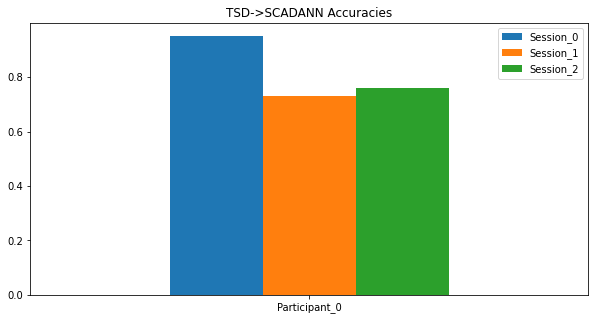

In [46]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD->SCADANN Accuracies")
plt.show()

In [47]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Sub"
n_name = "Loc"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 3)
predictions =  (1, 3)
accuracies_gestures =  (22, 3)


,Unnamed: 0,Sub0_Loc0,Sub0_Loc1,Sub0_Loc2
0,M0,1.000000,1.000000,1.000000
1,M1,1.000000,0.792308,0.900000
2,M2,0.819231,0.538462,0.965385
3,M3,0.865385,0.450000,0.988462
4,M4,0.865385,0.673077,0.207692
5,M5,0.976923,0.538462,0.969231
6,M6,0.996154,0.642308,0.865385
7,M7,0.992308,0.757692,0.653846
8,M8,1.000000,0.988462,0.984615
9,M9,1.000000,0.869231,0.857692


# Conclusion
In general, overall accuracies of SCADANN is better than DANN, and DANN is better than TSD.   

Occasionally accuracies of SCADANN ends up a little smaller than DANN, reasons may be lack of datasets put into training model (fixed) and non-optimal percentage_same_gesture_sable (fixed). Code should be reproducable if processed dataset stick to the shape defined above.

* What to check if sth goes wrong:
    * percentage_same_gesture_sable
    * number of cycles or sessions
    * shape of dataloaders (combination of train, test, valid should include all dataset)
    * shape of procssed datasets
    * directory paths of weights and results
    * if weights are stored or loaded correclty

In [48]:
print("ConvNet")
display(ConvNet_df)
print("ConvNet->DANN")
display(ConvNet_DANN_df)
print("ConvNet->SCADANN")
display(ConvNet_SCADANN_df)

ConvNet


,Participant_0
Session_0,0.792133
Session_1,0.535839
Session_2,0.571154


ConvNet->DANN


,Participant_0
Session_0,0.792133
Session_1,0.576573
Session_2,0.620455


ConvNet->SCADANN


,Participant_0
Session_0,0.792133
Session_1,0.641608
Session_2,0.631119


In [49]:
print("TSD")
display(TSD_df)
print("TSD->DANN")
display(DANN_df)
print("TSD->SCADANN")
display(SCADANN_df)

TSD


,Participant_0
Session_0,0.951748
Session_1,0.69458
Session_2,0.654371


TSD->DANN


,Participant_0
Session_0,0.951748
Session_1,0.698077
Session_2,0.720455


TSD->SCADANN


,Participant_0
Session_0,0.951748
Session_1,0.731119
Session_2,0.761014


In [50]:
diff_df = SCADANN_df-TSD_df
diff_df = diff_df.drop('Session_0')
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/ConvNet_vs_TSD_TSD_side.csv')

,Participant_0
Session_1,0.036538
Session_2,0.106643


In [51]:
diff_df = ConvNet_SCADANN_df-ConvNet_df
diff_df = diff_df.drop('Session_0')
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/ConvNet_vs_TSD_ConvNet_side.csv')

,Participant_0
Session_1,0.105769
Session_2,0.059965


In [52]:
overall_acc_df = pd.DataFrame([ConvNet_acc_overall, TSD_acc_overall, 
                               ConvNet_DANN_acc_overall, DANN_acc_overall, 
                               ConvNet_SCADANN_acc_overall, SCADANN_acc_overall],
                             index = ["ConvNet", "TSD", "ConvNet_DANN", "DANN", "ConvNet_SCADANN","SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
ConvNet,0.633042
TSD,0.766900
ConvNet_DANN,0.663054
DANN,0.790093
ConvNet_SCADANN,0.688287
SCADANN,0.814627


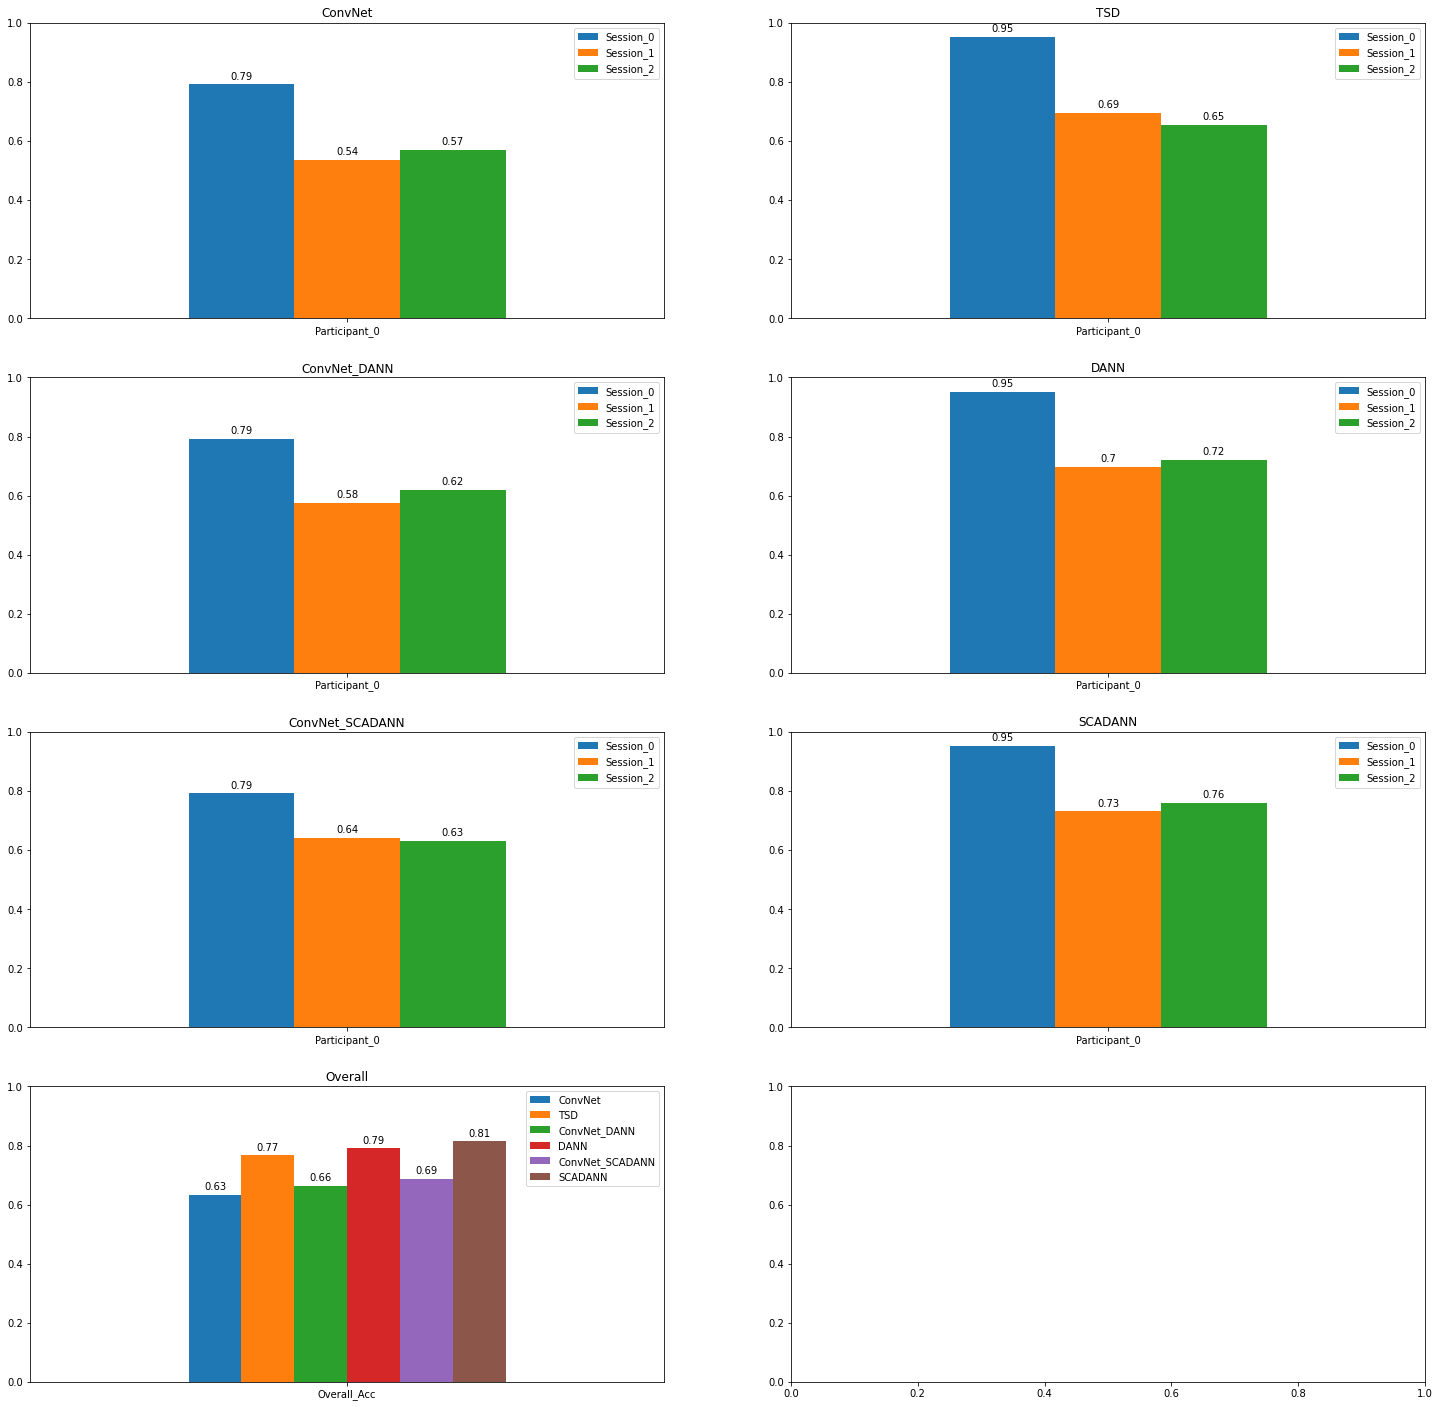

In [54]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25,25))
acc_list = [ConvNet_df, TSD_df, ConvNet_DANN_df, DANN_df, ConvNet_SCADANN_df, SCADANN_df, overall_acc_df]
title_list = ["ConvNet", "TSD", "ConvNet_DANN", "DANN", "ConvNet_SCADANN","SCADANN", "Overall", ""]
for idx, ax in enumerate(axes.reshape(-1)): 
    if idx < len(acc_list):
        acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
        ax.set_title(title_list[idx])
        ax.set_ylim([0, 1.0])
        for p in ax.patches:
            ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                        ha='center', va='center', xytext=(0, 8),textcoords='offset points')